<a href="https://colab.research.google.com/github/Anna172/ML/blob/master/%D0%90%D0%94%D0%92%D0%91_HW2_P2_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("Anna_Trushnikova_BBI172_HW2_p1_1.csv", sep=';', decimal=',',  parse_dates=['period_start_dt'])
data.head()

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing
0,15,40369,317,2016-12-19,50.0,0.0,500.0,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
1,16,40370,317,2016-12-19,44.0,0.0,1000.0,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
2,17,40372,317,2016-12-19,13.0,0.0,2000.0,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
3,18,40373,317,2016-12-19,6.0,0.0,3000.0,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4
4,19,46272,317,2016-12-19,34.0,0.0,157.0,157.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4


In [3]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35329,100,0,0,0,0,int64
product_rk,6,0.0169832,0,0,0,0,int64
store_location_rk,40,0.113221,0,0,0,0,int64
period_start_dt,159,0.450055,0,0,0,0,datetime64[ns]
demand,1658,4.69303,0,0,1200,3.39664,float64
PROMO1_FLAG,3,0.00849161,28493,80.6505,0,0,float64
PRICE_REGULAR,229,0.648193,0,0,0,0,float64
PRICE_AFTER_DISC,1036,2.93244,0,0,0,0,float64
AUTORIZATION_FLAG,2,0.00566107,3246,9.18792,0,0,float64
Month,12,0.0339664,0,0,0,0,int64


In [4]:
columns = ["COUNT", 'MEAN', 'STD', 'MIN', '25%', '50%', '75%', 'MAX']
numeric_data = data.select_dtypes(include=np.number)
dt = pd.DataFrame(index=numeric_data.columns, columns=columns)

for col in numeric_data.columns:
  dt.loc[col,"COUNT"] = numeric_data[numeric_data[col] >= 0][col].count()
  dt.loc[col,"MEAN"] = numeric_data[numeric_data[col] >= 0][col].mean()
  dt.loc[col,"STD"] = numeric_data[numeric_data[col] >= 0][col].std()
  dt.loc[col,"MIN"] = numeric_data[numeric_data[col] >= 0][col].min()
  dt.loc[col,"25%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.25)
  dt.loc[col,"50%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.50)
  dt.loc[col,"75%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.75)
  dt.loc[col,"MAX"] = numeric_data[numeric_data[col] >= 0][col].max()

dt

,COUNT,MEAN,STD,MIN,25%,50%,75%,MAX
id,35329,17774.1,10253.7,15,8893,17778,26651,35541
product_rk,35329,49257,19148.4,40369,40370,40372,46272,96212
store_location_rk,35329,844.467,333.117,317,535,862,1173,1380
demand,34129,54.7952,108.646,0.033333,4,9,25,711
PROMO1_FLAG,35329,0.20544,0.432585,0,0,0,0,2
PRICE_REGULAR,35329,1167.33,1047.24,49,284.29,1000,2000,3000
PRICE_AFTER_DISC,35329,1155.65,1057.98,8.64706,199,1000,2000,3000
AUTORIZATION_FLAG,35329,0.908121,0.288859,0,1,1,1,1
Month,35329,6.70036,3.4945,1,4,7,10,12
Week,35329,2.75026,1.31394,1,2,3,4,5


Было замечено, что про флаг принемает значение 2. Неизвестно, что это означает. Будем считать, что было проведено сразу 2 промо.

In [5]:
# Date Features
data['year'] = data['period_start_dt'].dt.year
data['day'] = data['period_start_dt'].dt.day
data['dayofyear'] = data['period_start_dt'].dt.dayofyear
data['weekofyear'] = data['period_start_dt'].dt.weekofyear
data['month'] = data['Month']

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,day,dayofyear,weekofyear,month
0,15,40369,317,2016-12-19,50.0,0.0,500.00,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12
1,16,40370,317,2016-12-19,44.0,0.0,1000.00,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12
2,17,40372,317,2016-12-19,13.0,0.0,2000.00,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12
3,18,40373,317,2016-12-19,6.0,0.0,3000.00,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12
4,19,46272,317,2016-12-19,34.0,0.0,157.00,157.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,35537,40370,1380,2019-12-30,NaN,0.0,1000.00,1000.0,1.0,12,5.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2019,30,364,1,12
35325,35538,40372,1380,2019-12-30,NaN,0.0,2000.00,2000.0,1.0,12,5.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2019,30,364,1,12
35326,35539,40373,1380,2019-12-30,NaN,0.0,3000.00,3000.0,1.0,12,5.0,203.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311

Создадим лаговые параметры:

- лаг на 1-12 месяцев
- разница с 1-12 месяцами
- среднее, стд, медиана, мода, МАКС, МИН за 1-12 месяцев с лагом на 1-12 месяцев
- разница со средним
- количество других товаров в магазине
- разница в количестве других товаров в магазине
- количество этого товара в других магазинах
- прирост товара в других магазинах
- изменение цены на товар по равнению с 1-12 месяцами, или средним по цене
- коэф дельта товар к дельта цене



In [6]:
funcs = ['mean', 'std', 'max', 'min', 'quantile', 'median']
pers = ['weekofyear', 'month', 'year']

In [7]:
# создаем сренее и другие функции за месяц и другие периоды
# все это в разрезе продукта, магазина или продукта-магазина

for func in funcs:

  monthly_func = 'mothly_' + func
  monthly_func_s = 'mothly_' + func + '_s'  
  monthly_func_p = 'mothly_' + func + '_p'

  data[monthly_func] = data.groupby(['product_rk', 'store_location_rk', 'month', 'year'])['demand'].transform(func)
  data[monthly_func_s] = data.groupby(['store_location_rk', 'month', 'year'])['demand'].transform(func)
  data[monthly_func_p] = data.groupby(['product_rk', 'month', 'year'])['demand'].transform(func)

  for per in pers:

    per_func = per + '_' + func
    per_func_s = per + '_' + func + '_s'
    per_func_p = per + '_' + func +'_p'
    data[per_func]  = data.groupby(['product_rk', 'store_location_rk', per])['demand'].transform(func)
    data[per_func_s]  = data.groupby(['store_location_rk', per])['demand'].transform(func)
    data[per_func_p]  = data.groupby(['product_rk', per])['demand'].transform(func)

data

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,day,dayofyear,weekofyear,month,mothly_mean,mothly_mean_s,mothly_mean_p,weekofyear_mean,weekofyear_mean_s,weekofyear_mean_p,month_mean,month_mean_s,month_mean_p,year_mean,year_mean_s,year_mean_p,...,month_max_p,year_max,year_max_s,year_max_p,mothly_min,mothly_min_s,mothly_min_p,weekofyear_min,weekofyear_min_s,weekofyear_min_p,month_min,month_min_s,month_min_p,year_min,year_min_s,year_min_p,mothly_quantile,mothly_quantile_s,mothly_quantile_p,weekofyear_quantile,weekofyear_quantile_s,weekofyear_quantile_p,month_quantile,month_quantile_s,month_quantile_p,year_quantile,year_quantile_s,year_quantile_p,mothly_median,mothly_median_s,mothly_median_p,weekofyear_median,weekofyear_median_s,weekofyear_median_p,month_median,month_median_s,month_median_p,year_median,year_median_s,year_median_p
0,15,40369,317,2016-12-19,50.0,0.0,500.00,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,57.5,36.7,56.029412,27.333333,33.332904,41.697976,33.690710,28.626242,51.583499,57.500000,36.700000,56.029412,...,307.463660,65.000000,83.000000,227.000000,50.0,6.0,3.0,10.0,3.0,2.000000,3.0,1.0,1.000000,50.0,6.0,3.000000,57.5,34.5,47.0,22.0,10.0,24.000000,34.000000,11.0,28.612022,57.5,34.5,47.0,57.5,34.5,47.0,22.0,10.0,24.000000,34.000000,11.0,28.612022,57.5,34.5,47.0
1,16,40370,317,2016-12-19,44.0,0.0,1000.00,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,63.5,36.7,76.367647,30.000000,33.332904,61.497690,36.753105,28.626242,71.552516,63.500000,36.700000,76.367647,...,519.247791,83.000000,83.000000,342.000000,44.0,6.0,7.0,13.0,3.0,1.000000,4.0,1.0,1.000000,44.0,6.0,7.000000,63.5,34.5,60.5,33.0,10.0,38.000000,33.000000,11.0,41.000000,63.5,34.5,60.5,63.5,34.5,60.5,33.0,10.0,38.000000,33.000000,11.0,41.000000,63.5,34.5,60.5
2,17,40372,317,2016-12-19,13.0,0.0,2000.00,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,21.5,36.7,30.073529,9.000000,33.332904,30.325166,13.165425,28.626242,35.706310,21.500000,36.700000,30.073529,...,263.806495,30.000000,83.000000,126.000000,13.0,6.0,5.0,7.0,3.0,2.000000,2.0,1.0,1.000000,13.0,6.0,5.000000,21.5,34.5,22.0,7.0,10.0,16.000000,7.000000,11.0,17.000000,21.5,34.5,22.0,21.5,34.5,22.0,7.0,10.0,16.000000,7.000000,11.0,17.000000,21.5,34.5,22.0
3,18,40373,317,2016-12-19,6.0,0.0,3000.00,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74

In [8]:
# смотрим разницу по средним и другими функциями по неделе и другим периодам между разными срезами
for per in ['weekofyear_', 'month_', 'year_', 'mothly_']:
  for func in funcs:
    diff_s_p = 'diff_' + per + func + '_s_p'
    diff_s_sp = 'diff_' + per + func + '_s_sp'
    diff_p_sp = 'diff_' + per + func + '_p_sp'

    col_s = per + func + '_s'
    col_p = per + func + '_p'
    col_sp = per + func

    data[diff_s_p] = data[col_s] - data[col_p]
    data[diff_s_sp] = data[col_s] - data[col_sp]
    data[diff_p_sp] = data[col_p] - data[col_sp]
    
data

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,day,dayofyear,weekofyear,month,mothly_mean,mothly_mean_s,mothly_mean_p,weekofyear_mean,weekofyear_mean_s,weekofyear_mean_p,month_mean,month_mean_s,month_mean_p,year_mean,year_mean_s,year_mean_p,...,diff_month_quantile_p_sp,diff_month_median_s_p,diff_month_median_s_sp,diff_month_median_p_sp,diff_year_mean_s_p,diff_year_mean_s_sp,diff_year_mean_p_sp,diff_year_std_s_p,diff_year_std_s_sp,diff_year_std_p_sp,diff_year_max_s_p,diff_year_max_s_sp,diff_year_max_p_sp,diff_year_min_s_p,diff_year_min_s_sp,diff_year_min_p_sp,diff_year_quantile_s_p,diff_year_quantile_s_sp,diff_year_quantile_p_sp,diff_year_median_s_p,diff_year_median_s_sp,diff_year_median_p_sp,diff_mothly_mean_s_p,diff_mothly_mean_s_sp,diff_mothly_mean_p_sp,diff_mothly_std_s_p,diff_mothly_std_s_sp,diff_mothly_std_p_sp,diff_mothly_max_s_p,diff_mothly_max_s_sp,diff_mothly_max_p_sp,diff_mothly_min_s_p,diff_mothly_min_s_sp,diff_mothly_min_p_sp,diff_mothly_quantile_s_p,diff_mothly_quantile_s_sp,diff_mothly_quantile_p_sp,diff_mothly_median_s_p,diff_mothly_median_s_sp,diff_mothly_median_p_sp
0,15,40369,317,2016-12-19,50.0,0.0,500.00,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,57.5,36.7,56.029412,27.333333,33.332904,41.697976,33.690710,28.626242,51.583499,57.500000,36.700000,56.029412,...,-5.387978,-17.612022,-23.000000,-5.387978,-19.329412,-20.800000,-1.470588,-19.469647,14.373613,33.843260,-144.000000,18.000000,162.000000,3.000000,-44.0,-47.000000,-12.5,-23.0,-10.5,-12.5,-23.0,-10.5,-19.329412,-20.8,-1.470588,-19.469647,14.373613,33.843260,-144.0,18.0,162.0,3.0,-44.0,-47.0,-12.5,-23.0,-10.5,-12.5,-23.0,-10.5
1,16,40370,317,2016-12-19,44.0,0.0,1000.00,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,63.5,36.7,76.367647,30.000000,33.332904,61.497690,36.753105,28.626242,71.552516,63.500000,36.700000,76.367647,...,8.000000,-30.000000,-22.000000,8.000000,-39.667647,-26.800000,12.867647,-32.170778,-2.596950,29.573828,-259.000000,0.000000,259.000000,-1.000000,-38.0,-37.000000,-26.0,-29.0,-3.0,-26.0,-29.0,-3.0,-39.667647,-26.8,12.867647,-32.170778,-2.596950,29.573828,-259.0,0.0,259.0,-1.0,-38.0,-37.0,-26.0,-29.0,-3.0,-26.0,-29.0,-3.0
2,17,40372,317,2016-12-19,13.0,0.0,2000.00,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,21.5,36.7,30.073529,9.000000,33.332904,30.325166,13.165425,28.626242,35.706310,21.500000,36.700000,30.073529,...,10.000000,-6.000000,4.000000,10.000000,6.626471,15.200000,8.573529,0.913568,12.959399,12.045831,-43.000000,53.000000,96.000000,1.000000,-7.0,-8.000000,12.5,13.0,0.5,12.5,13.0,0.5,6.626471,15.2,8.573529

In [9]:
# найдем значения спроса и цены с лагом от 1 до 24
for lag in range(1, 25):
  lag_d = 'lag' + str(lag) + '_demand'
  lag_p = 'lag' + str(lag) + '_price'

  data[lag_d] = data.groupby(['store_location_rk', 'product_rk'])['demand'].shift(lag)
  data[lag_p] = data.groupby(['store_location_rk', 'product_rk'])['PRICE_REGULAR'].shift(lag)
  
data

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,day,dayofyear,weekofyear,month,mothly_mean,mothly_mean_s,mothly_mean_p,weekofyear_mean,weekofyear_mean_s,weekofyear_mean_p,month_mean,month_mean_s,month_mean_p,year_mean,year_mean_s,year_mean_p,...,lag5_demand,lag5_price,lag6_demand,lag6_price,lag7_demand,lag7_price,lag8_demand,lag8_price,lag9_demand,lag9_price,lag10_demand,lag10_price,lag11_demand,lag11_price,lag12_demand,lag12_price,lag13_demand,lag13_price,lag14_demand,lag14_price,lag15_demand,lag15_price,lag16_demand,lag16_price,lag17_demand,lag17_price,lag18_demand,lag18_price,lag19_demand,lag19_price,lag20_demand,lag20_price,lag21_demand,lag21_price,lag22_demand,lag22_price,lag23_demand,lag23_price,lag24_demand,lag24_price
0,15,40369,317,2016-12-19,50.0,0.0,500.00,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,57.5,36.7,56.029412,27.333333,33.332904,41.697976,33.690710,28.626242,51.583499,57.500000,36.700000,56.029412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,40370,317,2016-12-19,44.0,0.0,1000.00,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,63.5,36.7,76.367647,30.000000,33.332904,61.497690,36.753105,28.626242,71.552516,63.500000,36.700000,76.367647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,40372,317,2016-12-19,13.0,0.0,2000.00,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,21.5,36.7,30.073529,9.000000,33.332904,30.325166,13.165425,28.626242,35.706310,21.500000,36.700000,30.073529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,40373,317,2016-12-19,6.0,0.0,3000.00,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,6.5,36.7,19.720588,5.000000,33.332904,24.258219,10.848982,28.626242,28.285424,6.500000,36.700000,19.720588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,46272,317,2016-12-19,34.0,0.0,157.00,157

In [10]:
# найдем разные функции с разными лагами
for lag in range(1, 25):
  r = []
  for func in funcs:
    rol_func_lag = 'rol_' + func + '_lag' + str(lag)
    r.append(rol_func_lag)

  data[r[0]] = data.groupby(['store_location_rk', 'product_rk'])['demand'].rolling(lag, min_periods=1).mean().reset_index()['demand']
  data[r[1]] = data.groupby(['store_location_rk', 'product_rk'])['demand'].rolling(lag, min_periods=1).std().reset_index()['demand']
  data[r[2]] = data.groupby(['store_location_rk', 'product_rk'])['demand'].rolling(lag, min_periods=1).max().reset_index()['demand']
  data[r[3]] = data.groupby(['store_location_rk', 'product_rk'])['demand'].rolling(lag, min_periods=1).min().reset_index()['demand']
  data[r[4]] = data.groupby(['store_location_rk', 'product_rk'])['demand'].rolling(lag, min_periods=1).quantile(0.75).reset_index()['demand']
  data[r[5]] = data.groupby(['store_location_rk', 'product_rk'])['demand'].rolling(lag, min_periods=1).median().reset_index()['demand']

data.head()

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,day,dayofyear,weekofyear,month,mothly_mean,mothly_mean_s,mothly_mean_p,weekofyear_mean,weekofyear_mean_s,weekofyear_mean_p,month_mean,month_mean_s,month_mean_p,year_mean,year_mean_s,year_mean_p,...,rol_max_lag18,rol_min_lag18,rol_quantile_lag18,rol_median_lag18,rol_mean_lag19,rol_std_lag19,rol_max_lag19,rol_min_lag19,rol_quantile_lag19,rol_median_lag19,rol_mean_lag20,rol_std_lag20,rol_max_lag20,rol_min_lag20,rol_quantile_lag20,rol_median_lag20,rol_mean_lag21,rol_std_lag21,rol_max_lag21,rol_min_lag21,rol_quantile_lag21,rol_median_lag21,rol_mean_lag22,rol_std_lag22,rol_max_lag22,rol_min_lag22,rol_quantile_lag22,rol_median_lag22,rol_mean_lag23,rol_std_lag23,rol_max_lag23,rol_min_lag23,rol_quantile_lag23,rol_median_lag23,rol_mean_lag24,rol_std_lag24,rol_max_lag24,rol_min_lag24,rol_quantile_lag24,rol_median_lag24
0,15,40369,317,2016-12-19,50.0,0.0,500.0,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,57.5,36.7,56.029412,27.333333,33.332904,41.697976,33.690710,28.626242,51.583499,57.5,36.7,56.029412,...,50.0,50.000000,50.00,50.000000,50.000000,NaN,50.0,50.000000,50.00,50.000000,50.000000,NaN,50.0,50.000000,50.00,50.000000,50.000000,NaN,50.0,50.000000,50.00,50.000000,50.000000,NaN,50.0,50.000000,50.00,50.000000,50.000000,NaN,50.0,50.000000,50.00,50.000000,50.000000,NaN,50.0,50.000000,50.00,50.000000
1,16,40370,317,2016-12-19,44.0,0.0,1000.0,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,63.5,36.7,76.367647,30.000000,33.332904,61.497690,36.753105,28.626242,71.552516,63.5,36.7,76.367647,...,65.0,50.000000,61.25,57.500000,57.500000,10.606602,65.0,50.000000,61.25,57.500000,57.500000,10.606602,65.0,50.000000,61.25,57.500000,57.500000,10.606602,65.0,50.000000,61.25,57.500000,57.500000,10.606602,65.0,50.000000,61.25,57.500000,57.500000,10.606602,65.0,50.000000,61.25,57.500000,57.500000,10.606602,65.0,50.000000,61.25,57.500000
2,17,40372,317,2016-12-19,13.0,0.0,2000.0,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,21.5,36.7,30.073529,9.000000,33.332904,30.325166,13.165425,28.626242,35.706310,21.5,36.7,30.073529,...,65.0,41.251366,57.50,50.000000,52.083789,12.010663,65.0,41.251366,57.50,50.000000,52.083789,12.010663,65.0,41.251366,57.50,50.000000,52.083789,12.010663,65.0,41.251366,57.50,50.000000,52.083789,12.010663,65.0,41.251366,57.50,50.000000,52.083789,12.010663,65.0,41.251366,57.50,50.000000,52.083789,12.010663,65.0,41.251366,57.50,50.000000
3,18,40373,317,2016-12-19,6.0,0.0,3000.0,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A

In [11]:
# найдем лаги к разным ф с разными лагами
for Lag in range(1, 25):
  for lag in range(1, 25):
    r = []
    for func in funcs:
      rol_func_lag = 'rol_' + func + '_lag' + str(lag)
      lag_c = 'lag' + str(Lag) + '_' + rol_func_lag
      data[lag_c] = data.groupby(['store_location_rk', 'product_rk'])[rol_func_lag].shift(Lag)

data.head()  

  

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,day,dayofyear,weekofyear,month,mothly_mean,mothly_mean_s,mothly_mean_p,weekofyear_mean,weekofyear_mean_s,weekofyear_mean_p,month_mean,month_mean_s,month_mean_p,year_mean,year_mean_s,year_mean_p,...,lag24_rol_max_lag18,lag24_rol_min_lag18,lag24_rol_quantile_lag18,lag24_rol_median_lag18,lag24_rol_mean_lag19,lag24_rol_std_lag19,lag24_rol_max_lag19,lag24_rol_min_lag19,lag24_rol_quantile_lag19,lag24_rol_median_lag19,lag24_rol_mean_lag20,lag24_rol_std_lag20,lag24_rol_max_lag20,lag24_rol_min_lag20,lag24_rol_quantile_lag20,lag24_rol_median_lag20,lag24_rol_mean_lag21,lag24_rol_std_lag21,lag24_rol_max_lag21,lag24_rol_min_lag21,lag24_rol_quantile_lag21,lag24_rol_median_lag21,lag24_rol_mean_lag22,lag24_rol_std_lag22,lag24_rol_max_lag22,lag24_rol_min_lag22,lag24_rol_quantile_lag22,lag24_rol_median_lag22,lag24_rol_mean_lag23,lag24_rol_std_lag23,lag24_rol_max_lag23,lag24_rol_min_lag23,lag24_rol_quantile_lag23,lag24_rol_median_lag23,lag24_rol_mean_lag24,lag24_rol_std_lag24,lag24_rol_max_lag24,lag24_rol_min_lag24,lag24_rol_quantile_lag24,lag24_rol_median_lag24
0,15,40369,317,2016-12-19,50.0,0.0,500.0,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,57.5,36.7,56.029412,27.333333,33.332904,41.697976,33.690710,28.626242,51.583499,57.5,36.7,56.029412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,40370,317,2016-12-19,44.0,0.0,1000.0,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,63.5,36.7,76.367647,30.000000,33.332904,61.497690,36.753105,28.626242,71.552516,63.5,36.7,76.367647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,40372,317,2016-12-19,13.0,0.0,2000.0,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,21.5,36.7,30.073529,9.000000,33.332904,30.325166,13.165425,28.626242,35.706310,21.5,36.7,30.073529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,40373,317,2016-12-19,6.0,0.0,3000.0,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F

In [12]:
# наудем коэффициент к и его лаг

data['delta_q']  = data.groupby(['product_rk', 'store_location_rk'])['demand'].transform('diff')
data['delta_p']  = data.groupby(['product_rk', 'store_location_rk'])['PRICE_REGULAR'].transform('diff')
data['k'] = data['delta_q']/data['delta_p']

for lag in range(1, 25):
  k_lag = 'k_lag' + str(lag)
  
  data[k_lag] = data.groupby(['store_location_rk', 'product_rk'])['k'].shift(lag)

data.shape

(35329, 3847)

In [13]:
# найдем прирост сущевующего значения спроса и цены по сравнению с н периодом

for lag in range(1, 25):

  lag_d = 'lag' + str(lag) + '_demand'
  lag_p = 'lag' + str(lag) + '_price'
  diff_lag_d = 'diff_lag' + str(lag) + '_demand'
  diff_lag_p = 'diff_lag' + str(lag) + '_price'

  data[diff_lag_d] = data['demand'] - data[lag_d] 
  data[diff_lag_p] = data['PRICE_REGULAR'] - data[lag_p]  

data.shape  

(35329, 3895)

In [14]:
# найдем лаги к приросту цен и спроса с разним лагом
for Lag in range(1, 25):
  for lag in range(1, 25):
    lag_d = 'diff_lag' + str(lag) + '_demand'
    lag_p = 'diff_lag' + str(lag) + '_price'
    lag_lag_d = str(Lag) + 'delta_demand_lag' + str(lag)    
    lag_lag_p = str(Lag) + 'delta_price_lag' + str(lag)

    data[lag_lag_d] = data.groupby(['store_location_rk', 'product_rk'])[lag_d].shift(Lag)
    data[lag_lag_p] = data.groupby(['store_location_rk', 'product_rk'])[lag_p].shift(Lag)

data.head()  

,id,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,day,dayofyear,weekofyear,month,mothly_mean,mothly_mean_s,mothly_mean_p,weekofyear_mean,weekofyear_mean_s,weekofyear_mean_p,month_mean,month_mean_s,month_mean_p,year_mean,year_mean_s,year_mean_p,...,24delta_demand_lag5,24delta_price_lag5,24delta_demand_lag6,24delta_price_lag6,24delta_demand_lag7,24delta_price_lag7,24delta_demand_lag8,24delta_price_lag8,24delta_demand_lag9,24delta_price_lag9,24delta_demand_lag10,24delta_price_lag10,24delta_demand_lag11,24delta_price_lag11,24delta_demand_lag12,24delta_price_lag12,24delta_demand_lag13,24delta_price_lag13,24delta_demand_lag14,24delta_price_lag14,24delta_demand_lag15,24delta_price_lag15,24delta_demand_lag16,24delta_price_lag16,24delta_demand_lag17,24delta_price_lag17,24delta_demand_lag18,24delta_price_lag18,24delta_demand_lag19,24delta_price_lag19,24delta_demand_lag20,24delta_price_lag20,24delta_demand_lag21,24delta_price_lag21,24delta_demand_lag22,24delta_price_lag22,24delta_demand_lag23,24delta_price_lag23,24delta_demand_lag24,24delta_price_lag24
0,15,40369,317,2016-12-19,50.0,0.0,500.0,500.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,57.5,36.7,56.029412,27.333333,33.332904,41.697976,33.690710,28.626242,51.583499,57.5,36.7,56.029412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,40370,317,2016-12-19,44.0,0.0,1000.0,1000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,63.5,36.7,76.367647,30.000000,33.332904,61.497690,36.753105,28.626242,71.552516,63.5,36.7,76.367647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,40372,317,2016-12-19,13.0,0.0,2000.0,2000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,21.5,36.7,30.073529,9.000000,33.332904,30.325166,13.165425,28.626242,35.706310,21.5,36.7,30.073529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,40373,317,2016-12-19,6.0,0.0,3000.0,3000.0,1.0,12,3.0,189.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,19,354,51,12,6.5,36.7,19.720588,5.000000,33

Было создано много разных лаговых фичей, общее количество признаков сейчас равняется 5047. Удалим из них все, что имеют много (более 3000) пропущенных значений.

In [15]:
demand = pd.DataFrame(index=data.index)
demand['demand'] = data['demand']
demand['id'] = data['id']

demand.shape

(35329, 2)

In [16]:
columns = [ 'NANS']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())


,NANS
id,0
product_rk,0
store_location_rk,0
period_start_dt,0
demand,1200
...,...
24delta_price_lag22,11040
24delta_demand_lag23,11280
24delta_price_lag23,11280
24delta_demand_lag24,11520


In [19]:
columns = dt[dt['NANS'] > 3000].index
len(columns)

2944

In [21]:
for col in columns:
  data = data.drop(col, axis=1)

data.shape

(35329, 2103)

In [22]:
data.to_csv("Anna_Trushnikova_BBI172_HW2_p2_afterdrop1.csv", index=False, sep=';', decimal=',', encoding='utf-8')

In [81]:
data = pd.read_csv("Anna_Trushnikova_BBI172_HW2_p2_afterdrop1.csv", sep=';', decimal=',',  parse_dates=['period_start_dt'])

Теперь удалим те переменные, которые принимают только пропущенные значения в декабре 2019 года.

In [82]:
columns = [ 'NANS']
dd = data[ (data['period_start_dt'].dt.year == 2019) & (data['period_start_dt'].dt.month == 12)]
dt = pd.DataFrame(index=dd.columns, columns=columns)

for col in dd.columns:
  dt.loc[col,"NANS"] = np.sum(dd[col].isnull())

columns = dt[dt['NANS'] > 1100].index
len(columns)

In [83]:
columns = dt[dt['NANS'] > 1100].index
len(columns)

45

In [84]:
for col in columns:
  data = data.drop(col, axis=1)

data['demand'] = demand['demand']
data.shape

(35329, 2059)

In [85]:
columns = [ 'NANS']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())



In [90]:
len(dt[dt['NANS'] < 1200])

776

Есть достаточно много фичей с небольшим количеством пропусков, поэтому можем оставить только их.Удалим все остальные.

In [91]:
columns = dt[dt['NANS'] > 1199].index
for col in columns:
  data = data.drop(col, axis=1)

data['demand'] = demand['demand']
data.shape

(35329, 777)

In [92]:
data.to_csv("Anna_Trushnikova_BBI172_HW2_p2_afterdrop2.csv", index=False, sep=';', decimal=',', encoding='utf-8')

In [ ]:
data = pd.read_csv("Anna_Trushnikova_BBI172_HW2_p2_afterdrop2.csv", sep=';', decimal=',',  parse_dates=['period_start_dt'])

Теперь проверим гипотезу о том, что у оставшихся признаков пропущенные значения встречаются только в 2016 году. 

In [96]:
columns = [ 'NANS']
# & (data['period_start_dt'].dt.month == 12)
dd = data[ (data['period_start_dt'].dt.year == 2018) ]
dt = pd.DataFrame(index=dd.columns, columns=columns)

for col in dd.columns:
  dt.loc[col,"NANS"] = np.sum(dd[col].isnull())



In [98]:
columns = dt[dt['NANS'] > 0].index
len(columns)

549

Удалим их тоже

In [99]:
columns = dt[dt['NANS'] > 0].index
for col in columns:
  data = data.drop(col, axis=1)

data['demand'] = demand['demand']
data.shape

(35329, 228)

In [108]:
columns = [ 'NANS']
# & (data['period_start_dt'].dt.month == 12)
#dd = data[ (data['period_start_dt'].dt.year == 2016) ]
dt = pd.DataFrame(index=dd.columns, columns=columns)

for col in dd.columns:
  dt.loc[col,"NANS"] = np.sum(dd[col].isnull())



In [109]:
columns = dt[dt['NANS'] > 0].index
len(columns)

0

Все, теперь у нас не осталось пропущенных значений. Сохраним файл.

In [110]:
data.to_csv("Anna_Trushnikova_BBI172_HW2_p2_afterdrop3.csv", index=False, sep=';', decimal=',', encoding='utf-8')

In [156]:
# посмотрим, что получилось
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35329,100,0,0,0,0,int64
product_rk,6,0.0169832,0,0,0,0,int64
period_start_dt,159,0.450055,0,0,0,0,datetime64[ns]
PROMO1_FLAG,3,0.00849161,28493,80.6505,0,0,float64
PRICE_REGULAR,229,0.648193,0,0,0,0,float64
AUTORIZATION_FLAG,2,0.00566107,3246,9.18792,0,0,float64
Month,12,0.0339664,0,0,0,0,int64
Week,5,0.0141527,0,0,0,0,float64
STORE_LOCATION_LVL_RK4,13,0.036797,0,0,0,0,float64
STORE_LOCATION_ATTRIB2_hashing,2,0.00566107,0,0,0,0,object


In [112]:
columns = ["COUNT", 'MEAN', 'STD', 'MIN', '25%', '50%', '75%', 'MAX']
numeric_data = data.select_dtypes(include=np.number)
dt = pd.DataFrame(index=numeric_data.columns, columns=columns)

for col in numeric_data.columns:
  dt.loc[col,"COUNT"] = numeric_data[numeric_data[col] >= 0][col].count()
  dt.loc[col,"MEAN"] = numeric_data[numeric_data[col] >= 0][col].mean()
  dt.loc[col,"STD"] = numeric_data[numeric_data[col] >= 0][col].std()
  dt.loc[col,"MIN"] = numeric_data[numeric_data[col] >= 0][col].min()
  dt.loc[col,"25%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.25)
  dt.loc[col,"50%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.50)
  dt.loc[col,"75%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.75)
  dt.loc[col,"MAX"] = numeric_data[numeric_data[col] >= 0][col].max()

dt

,COUNT,MEAN,STD,MIN,25%,50%,75%,MAX
id,35329,17774.1,10253.7,15,8893,17778,26651,35541
product_rk,35329,49257,19148.4,40369,40370,40372,46272,96212
store_location_rk,35329,844.467,333.117,317,535,862,1173,1380
PROMO1_FLAG,35329,0.20544,0.432585,0,0,0,0,2
PRICE_REGULAR,35329,1167.33,1047.24,49,284.29,1000,2000,3000
...,...,...,...,...,...,...,...,...
rol_max_lag24,35329,183.511,145.427,1,44.3016,181.874,298.659,711
rol_min_lag24,35329,19.0605,71.0591,0.033333,1,2,4,519.248
rol_quantile_lag24,35329,55.5187,99.2842,1,9,15.25,33.25,519.248
rol_median_lag24,35329,32.1864,80.2786,1,5,8,15.2922,519.248


Теперь посмотрим, как переменные коррелируют между собой.

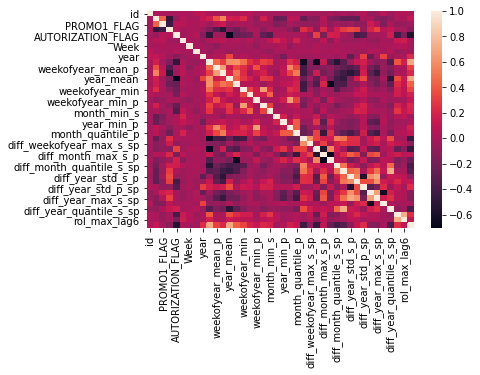

In [148]:
sns.heatmap(data.corr())

In [153]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

len(to_drop)


3

In [154]:
to_drop

['year_mean', 'diff_year_max_s_sp', 'demand']

In [152]:
# Drop features 
for col in to_drop:
  data = data.drop(col, axis=1)

data.shape

(35329, 49)

In [162]:
columns = [ 'NANS']
dd = data[ (data['period_start_dt'].dt.year == 2019) & (data['period_start_dt'].dt.month == 12)]
dt = pd.DataFrame(index=dd.columns, columns=columns)

for col in dd.columns:
  dt.loc[col,"NANS"] = np.sum(dd[col].isnull())

columns = dt[dt['NANS'] > 0].index
len(columns)

11

In [163]:
columns = dt[dt['NANS'] > 0].index
for col in columns:
  data = data.drop(col, axis=1)

data['demand'] = demand['demand']
data.shape

(35329, 39)

In [4]:
# посмотрим, что получилось
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
id,35329,100,0,0,0,0,int64
product_rk,6,0.0169832,0,0,0,0,int64
period_start_dt,159,0.450055,0,0,0,0,datetime64[ns]
PROMO1_FLAG,3,0.00849161,28493,80.6505,0,0,float64
PRICE_REGULAR,229,0.648193,0,0,0,0,float64
AUTORIZATION_FLAG,2,0.00566107,3246,9.18792,0,0,float64
Month,12,0.0339664,0,0,0,0,int64
Week,5,0.0141527,0,0,0,0,float64
STORE_LOCATION_LVL_RK4,13,0.036797,0,0,0,0,float64
STORE_LOCATION_ATTRIB2_hashing,2,0.00566107,0,0,0,0,object


In [165]:
dt[dt['NANS'] > 0].index

Index(['demand'], dtype='object')

Пропущенных значений не осталось, высококоррелированных признаков нет, это будет наша итоговая витрина.

Расделим выборку на test, train и validate sets.

In [3]:
data = pd.read_csv("Anna_Trushnikova_BBI172_HW2_p2_f1.csv", sep=';', decimal=',',  parse_dates=['period_start_dt'])
data.shape

(35329, 39)

In [6]:
data = data.drop('period_start_dt', axis=1)

In [10]:
train = data[(data['year'] != 2019) | (data['Month'] != 12)]
test = data[(data['year'] == 2019) & (data['Month'] == 12)]

print(train.shape)
test.shape

(34129, 38)


(1200, 38)

In [12]:
train.shape[0] * 0.8

27303.2

Соответственно все наблюдения, которые идут до 27303 индекса будут тренировочным сетом, до 34129 валидационным, остальные тренировочным. Сосдадим отвечающую за это переменную partition, которая будет равна 0 для тренировочного сета, 1 для валидационного и 2 для тестового.

In [25]:
data.sort_values(by=['year', 'Month'])
for i in range(27303):
  data.loc[i, 'Partition'] = 0
for i in range(27303, 34129):
  data.loc[i, 'Partition'] = 1
for i in range(34129, 35329):
  data.loc[i, 'Partition'] = 2

data.sort_values(by=['id'])  

,id,product_rk,PROMO1_FLAG,PRICE_REGULAR,AUTORIZATION_FLAG,Month,Week,STORE_LOCATION_LVL_RK4,STORE_LOCATION_ATTRIB2_hashing,STORE_LOCATION_ATTRIB3_hashing,STORE_LOCATION_ATTRIB4_hashing,STORE_LOCATION_ATTRIB8_hashing,STORE_LOCATION_ATTRIB9_hashing,STORE_LOCATION_ATTRIB10_hashing,STORE_LOCATION_ATTRIB11_hashing,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB15_hashing,year,weekofyear_mean_p,month_mean_p,year_mean,weekofyear_min_p,month_min_s,month_min_p,year_min_p,weekofyear_quantile_p,month_quantile_p,diff_month_max_s_p,diff_year_mean_s_sp,diff_year_std_s_p,diff_year_std_s_sp,diff_year_std_p_sp,diff_year_max_s_p,diff_year_max_s_sp,diff_year_max_p_sp,rol_mean_lag6,demand,Partition
0,15,40369,0.0,500.00,1.0,12,3.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,41.697976,51.583499,57.500000,2.000000,1.0,1.000000,3.000000,24.000000,28.612022,-8.804285,-20.800000,-19.469647,14.373613,33.843260,-144.000000,18.000000,162.000000,50.000000,50.0,0.0
1,16,40370,0.0,1000.00,1.0,12,3.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,61.497690,71.552516,63.500000,1.000000,1.0,1.000000,7.000000,38.000000,41.000000,-220.588416,-26.800000,-32.170778,-2.596950,29.573828,-259.000000,0.000000,259.000000,57.500000,44.0,0.0
2,17,40372,0.0,2000.00,1.0,12,3.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,30.325166,35.706310,21.500000,2.000000,1.0,1.000000,5.000000,16.000000,17.000000,34.852880,15.200000,0.913568,12.959399,12.045831,-43.000000,53.000000,96.000000,52.083789,13.0,0.0
3,18,40373,0.0,3000.00,1.0,12,3.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,24.258219,28.285424,6.500000,1.000000,1.0,1.000000,1.000000,11.000000,12.000000,116.785854,30.200000,8.389581,24.273108,15.883527,-2.000000,76.000000,78.000000,42.312841,6.0,0.0
4,19,46272,0.0,157.00,1.0,12,3.0,189.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,19517FD4F1E15806B405B9D730EEADCE,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,FC5FD090934CE685C1C12E5E0311F1D4,2016,28.260019,33.719954,34.500000,2.000000,1.0,0.333333,4.000000,12.916666,11.000000,50.552968,2.200000,4.499598,24.273108,19.773510,-13.000000,48.000000,61.000000,36.050273,34.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35324,35537,40370,0.0,1000.00,1.0,12,5.0,203.0,1B208496FEF79DB5BE9F374BF65865E6,9B9B954D2D5B0F1C5B0B129DF8DED631,04E5A06E3993F6C9A4BFDEF278636ED5,CB5A0648A9D14B22A85E039557A09205,B2581C791DBB8894BFDCFB66B60A17ED,2C3957E2A91B1D2BEE334248B387E402,67B1193B31375E3C959BB5246989D0CA,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB

In [26]:
data.to_csv("Anna_Trushnikova_BBI172_HW2_p2_f3.csv", index=False, sep=';', decimal=',', encoding='utf-8')